In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [2]:
#i'm using the stored data
#reading my data in csv format
#reading the first five rows of the data using the head function

df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
#for the purpose of this quiz, some columns wouldnt be required
#dropping does columns i.e. stab

df = df.drop(columns=['stab'])

In [4]:
X = df.drop(columns=['stabf'])
y = df[['stabf']]

#Split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [5]:
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.671365,0.380367,0.932340,0.821112,0.577835,0.068198,0.272932,0.954195,0.238500,0.837447,0.065691,0.813278
1,0.558188,0.607557,0.445405,0.349467,0.466385,0.193555,0.621676,0.798284,0.028968,0.385755,0.908498,0.854065
2,0.188048,0.408938,0.245239,0.504652,0.339393,0.531448,0.732018,0.712638,0.920287,0.084360,0.688470,0.014509
3,0.475764,0.179892,0.606958,0.008257,0.639912,0.026362,0.616975,0.474772,0.523093,0.016780,0.397283,0.804946
4,0.752247,0.914666,0.524646,0.993199,0.479150,0.496922,0.443090,0.637113,0.538482,0.075332,0.776320,0.263485


In [6]:
random_clf = RandomForestClassifier(random_state = 1)

In [7]:
random_clf.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [8]:
y_preds = random_clf.predict(X_test)

## Metrics for Random_forest classifier

In [10]:
acc = accuracy_score(y_test, y_preds)
round(acc, 4)

0.8905

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(random_state = 1)

In [12]:
extra_clf.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [13]:
y_preds = extra_clf.predict(X_test)
extra_acc = accuracy_score(y_test, y_preds)
round(extra_acc, 2)

0.89

## Hyper parameter tuning for extra tree classsifier using randomised search cv

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
# The following are the hyper-parameters and the various values for it to search for
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

# the parameters and the values is stored as a dictionary
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}


rcv_clf = RandomizedSearchCV(extra_clf, 
                             param_distributions=hyperparameter_grid,
                             cv = 5,
                             n_iter=10, 
                             scoring = 'accuracy', 
                             n_jobs = -1, verbose = 1, 
                             random_state = 1)


rcv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=10, n_jobs=None,
                                                  oob_score=False,
          

In [16]:
y_preds = rcv_clf.predict(X_test)
cv_acc = accuracy_score(y_test, y_preds)
round(cv_acc, 2), round(extra_acc, 2)

(0.93, 0.89)

In [17]:
#This attribute prints out the best parameters
rcv_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

## I train another exra tree clssifier using the best parameters

In [18]:
new_ext_tree_clf = ExtraTreesClassifier(n_estimators = 1000,
                                        min_samples_split = 2,
                                        min_samples_leaf= 8,
                                        max_features= None, random_state = 1)

In [19]:
new_ext_tree_clf.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=None, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=8, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [20]:
y_preds = new_ext_tree_clf.predict(X_test)
new_extra_tree_acc = accuracy_score(y_test, y_preds)
round(new_extra_tree_acc, 2), round(extra_acc, 2)

(0.93, 0.89)

In [21]:
# The code below gets the different feature importances, since it is an ndarray, it is converted to a list
feature_imp = new_ext_tree_clf.feature_importances_.tolist()

feature_imp = pd.Series(feature_imp)
cols = pd.Series(X_train.columns)

# This codes finally converts it to a dataframe
feat_imp = pd.DataFrame({'columns': cols, 'Data': feature_imp})
feat_imp.head(2)

,columns,Data
0,tau1,0.137240
1,tau2,0.140508


In [22]:
# feat_imp['columns'][feat_imp['Data'] == feat_imp['Data'].min()]

In [23]:
#prints ot the maximum and minimum feature importants as a dataframe
print('Min feature: {}'.format(feat_imp.loc[feat_imp['Data'] == feat_imp['Data'].min(), 'columns']))
print('Max feature: {}'.format(feat_imp.loc[feat_imp['Data'] == feat_imp['Data'].max(), 'columns']))

# feat_imp[(feat_imp['Data'] == feat_imp['Data'].min()) | (feat_imp['Data'] == feat_imp['Data'].max())]

Min feature: 4    p1
Name: columns, dtype: object
Max feature: 1    tau2
Name: columns, dtype: object


## Visualizing the features and their importance

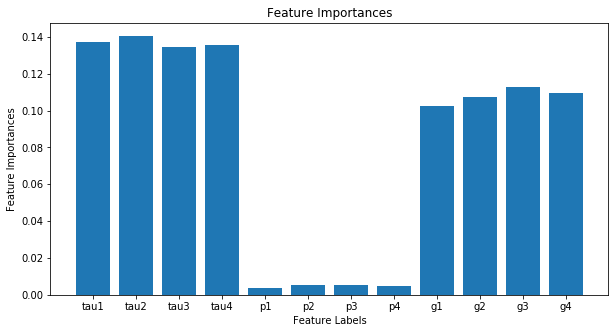

In [25]:
plt.figure(figsize=(10,5))
plt.bar('columns', 'Data', data =feat_imp) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Feature Importances');

### X_Gboost and Lightgbm

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb_clf = XGBClassifier(random_state = 1)
xgb_clf.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [28]:
y_preds = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, y_preds)
round(xgb_acc, 4)

0.9195

In [29]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(random_state = 1)
lgb_clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [30]:
y_preds = lgb_clf.predict(X_test)
lgb_acc = accuracy_score(y_test, y_preds)
round(lgb_acc, 4)

0.9415